<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/kmeans-clustering/kmeans_clustering_mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
! wget "https://raw.githubusercontent.com/fgith/data-science/main/datasets/Mall_Customers.csv"

--2022-03-31 09:17:02--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.19K  --.-KB/s    in 0s      

2022-03-31 09:17:02 (43.5 MB/s) - ‘Mall_Customers.csv’ saved [4286/4286]



In [9]:
df = pd.read_csv("Mall_Customers.csv")
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
df.head()

,CustomerID,Genre,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


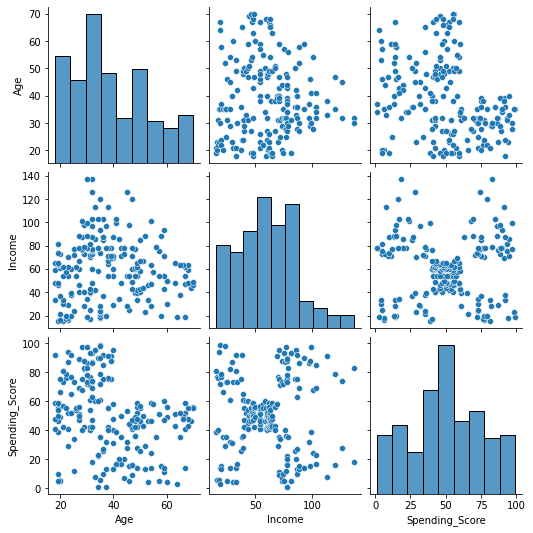

In [14]:
sns.pairplot(df[['Age','Income','Spending_Score']])

In [15]:
import sklearn.cluster as cluster

In [16]:
kmeans = cluster.KMeans(n_clusters=5,init="k-means++")
kmeans.fit(df[['Income','Spending_Score']])

KMeans(n_clusters=5)

In [17]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [18]:
df['Clusters'] = kmeans.labels_

In [19]:
df.head()

,CustomerID,Genre,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [23]:
df['Clusters'].value_counts()

<bound method Series.sort_values of 0    81
1    39
3    35
4    23
2    22
Name: Clusters, dtype: int64>

In [24]:
df.to_csv("Mall_Customers_Clustered",index=False)

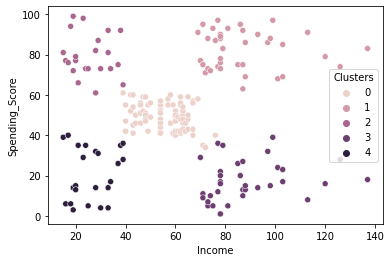

In [26]:
sns.scatterplot(x='Income',y='Spending_Score',hue='Clusters',data=df)